In [1]:
import pandas as pd
import numpy as np

In [2]:
# dont use modified_data_v3_item_imputed.csv, instead use v6

In [3]:
df = pd.read_csv('modified_data_v2.csv')

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [5]:
# df = df.iloc[:,:-10]

In [6]:
df.head()

,shop_id,shop_area_sq_ft,shop_profile,quantity_sold,tot_sales_amount,customer_id,invoice_id,transaction_date,BOTTLED DRINKING WATER 1.5L,BOTTLED DRINKING WATER 500ML,CHOCOLATE MILK 180ML,CREAM SODA 1.5L,CREAM SODA 1L,CREAM SODA 500ML,CREAM SODA APPLE POP 1L,DRY GINGER ALE PET 500ML,FIT O MANGO 1L,FIT O MANGO 200ML,FIT O MIXED FRUIT 1L,FIT O MIXED FRUIT 200ML,FIT O ORANGE 1L,FIT O ORANGE 200ML,GINGER BEER 1.5L,GINGER BEER 1L,GINGER BEER 400ML,GINGER BEER 500ML,GINGER BEER SUGAR FREE 500ML,KIK COLA 1L,LEMONADE 1.5L,LEMONADE 1L,LEMONADE 500ML,LIME CRUSH JUICE 1L,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
0,SHOP047,528,Moderate,1692,842960,928,1302,62,42,124,0,249,28,278,71,8,66,87,31,44,66,137,306,189,51,84,26,7,41,19,31,0,102,6,25,113,59,47,39,88,60,126,52,116,30
1,SHOP009,676,High,4589,1970870,2498,3493,62,123,427,0,686,62,451,203,56,76,102,115,182,208,223,1018,552,69,254,96,30,194,15,113,0,338,24,79,333,175,17,109,145,219,144,67,135,51
2,SHOP083,676,Low,3614,1691985,1900,2718,62,81,256,3,592,76,408,186,67,93,89,95,92,211,172,734,559,29,122,67,43,168,15,63,0,286,29,40,359,134,27,55,151,162,160,109,117,48
3,SHOP117,676,Low,4074,2325980,2037,3158,62,116,152,0,565,58,343,318,155,115,166,110,188,216,150,797,468,56,81,85,72,182,30,57,0,402,10,45,339,82,49,58,449,418,513,98,390,43
4,SHOP042,676,Low,3272,1340215,1841,2495,62,91,228,0,478,40,385,138,74,98,66,67,53,183,142,666,467,47,147,68,25,131,34,57,0,178,7,26,265,77,18,46,143,211,165,125,140,48


In [7]:
df.iloc[100:].head()

,shop_id,shop_area_sq_ft,shop_profile,quantity_sold,tot_sales_amount,customer_id,invoice_id,transaction_date,BOTTLED DRINKING WATER 1.5L,BOTTLED DRINKING WATER 500ML,CHOCOLATE MILK 180ML,CREAM SODA 1.5L,CREAM SODA 1L,CREAM SODA 500ML,CREAM SODA APPLE POP 1L,DRY GINGER ALE PET 500ML,FIT O MANGO 1L,FIT O MANGO 200ML,FIT O MIXED FRUIT 1L,FIT O MIXED FRUIT 200ML,FIT O ORANGE 1L,FIT O ORANGE 200ML,GINGER BEER 1.5L,GINGER BEER 1L,GINGER BEER 400ML,GINGER BEER 500ML,GINGER BEER SUGAR FREE 500ML,KIK COLA 1L,LEMONADE 1.5L,LEMONADE 1L,LEMONADE 500ML,LIME CRUSH JUICE 1L,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
100,SHOP046,545,NaN,3438,2607865,1736,2735,62,294,742,0,688,49,351,124,51,64,85,105,112,193,112,673,234,51,105,69,28,105,15,69,0,460,30,38,235,145,33,73,235,275,320,72,305,15
101,SHOP024,676,NaN,2883,1308795,1641,2302,62,224,264,0,516,50,390,73,72,76,66,70,112,141,76,568,194,81,126,103,18,73,12,29,0,330,14,34,219,128,21,47,129,116,188,62,128,35
102,SHOP023,617,NaN,4103,2570425,2227,3138,62,118,189,2,982,63,571,169,101,94,169,100,274,165,106,893,273,11,138,107,27,203,62,22,0,391,34,36,435,106,31,67,120,229,411,76,213,38
103,SHOP097,310,NaN,3148,2642380,1669,2436,62,189,314,0,301,0,296,97,225,87,105,83,128,317,129,669,0,32,228,121,12,210,34,84,0,215,0,46,206,88,0,55,237,488,281,85,651,36
104,SHOP044,715,NaN,2641,1310440,1552,2082,62,72,21,0,365,20,277,64,137,41,77,54,79,101,66,544,210,26,101,42,28,66,28,47,0,149,25,41,217,26,26,36,373,376,358,55,280,30


In [8]:
df.shape

(124, 45)

In [9]:
train = df.iloc[:100].copy()
test = df.iloc[100:].copy()

In [10]:
train = train.drop(columns=['shop_id'])

In [11]:
test = test.drop(columns=['shop_id'])

In [12]:
train['shop_profile'] = train['shop_profile'].replace({'High':2, 'Moderate':1, 'Low':0})

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   shop_area_sq_ft               100 non-null    int64
 1   shop_profile                  100 non-null    int64
 2   quantity_sold                 100 non-null    int64
 3   tot_sales_amount              100 non-null    int64
 4   customer_id                   100 non-null    int64
 5   invoice_id                    100 non-null    int64
 6   transaction_date              100 non-null    int64
 7   BOTTLED DRINKING WATER 1.5L   100 non-null    int64
 8   BOTTLED DRINKING WATER 500ML  100 non-null    int64
 9   CHOCOLATE MILK 180ML          100 non-null    int64
 10  CREAM SODA 1.5L               100 non-null    int64
 11  CREAM SODA 1L                 100 non-null    int64
 12  CREAM SODA 500ML              100 non-null    int64
 13  CREAM SODA APPLE POP 1L       100 no

In [14]:
X = train.drop(columns=['shop_profile']).values
Y = train['shop_profile'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [114]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler object
scaler = StandardScaler()

# Scale the columns of the numpy array
X = scaler.fit_transform(X)

## Cluster Analysis

In [115]:
import warnings
warnings.filterwarnings('ignore')

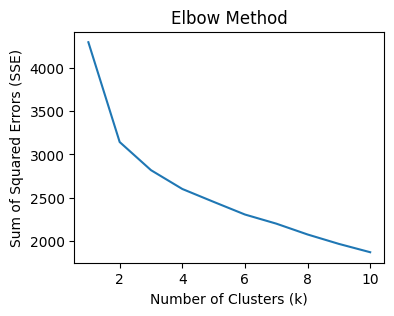

In [127]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

# Fit KMeans algorithm for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the SSE values against the number of clusters (k)
plt.figure(figsize=(4,3))
plt.plot(range(1, 11), sse)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method")
plt.show()

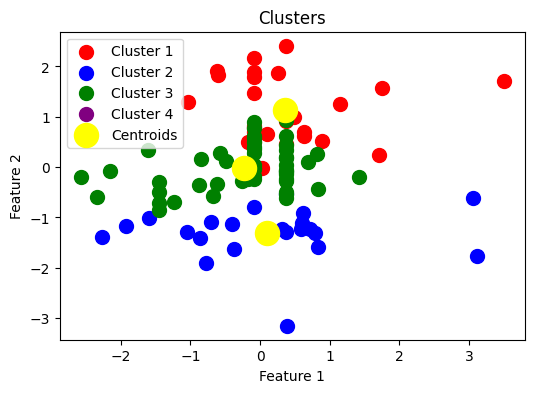

In [147]:
# Perform KMeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(6,4))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='purple', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [148]:
cluster_pred = pd.DataFrame()
cluster_pred['Actual'] = Y
cluster_pred['KMeans_Pred'] = y_kmeans
cluster_pred.head()

,Actual,KMeans_Pred
0,1,1
1,2,2
2,0,2
3,0,2
4,0,1


In [149]:
cluster_pred.corr()

,Actual,KMeans_Pred
Actual,1.000000,-0.547079
KMeans_Pred,-0.547079,1.000000


In [150]:
freq_table = pd.crosstab(cluster_pred['KMeans_Pred'], cluster_pred['Actual'])
freq_table

Actual,0,1,2
KMeans_Pred,,,
0,2,4,21
1,7,13,3
2,27,16,7


In [151]:
# cluster_pred['Actual'] = cluster_pred['Actual'].replace({2:'High', 1:'Moderate', 0:'Low'})
# cluster_pred["KMeans_Pred"] = cluster_pred["KMeans_Pred"].replace({3:'High', 1:'High', 2:'Moderate', 0:'Low'})

cluster_pred['Actual'] = cluster_pred['Actual'].replace({2:'High', 1:'Moderate', 0:'Low'})
cluster_pred["KMeans_Pred"] = cluster_pred["KMeans_Pred"].replace({0:'High', 1:'Moderate', 2:'Low'})

In [152]:
freq_table1 = pd.crosstab(cluster_pred['KMeans_Pred'], cluster_pred['Actual'])
freq_table1

Actual,High,Low,Moderate
KMeans_Pred,,,
High,21,2,4
Low,7,27,16
Moderate,3,7,13


In [123]:
freq_table1 = pd.crosstab(cluster_pred['KMeans_Pred'], cluster_pred['Actual'])
freq_table1

Actual,High,Low,Moderate
KMeans_Pred,,,
High,9,32,23
Low,8,1,0
Moderate,14,3,10


In [24]:
# from catboost import CatBoostClassifier
# model = CatBoostClassifier(
#     task_type="GPU",
#     iterations=1000,
#     random_seed=0,
#     learning_rate=0.01
# )
# model.fit(
#     x_train, y_train,
# #     cat_features=cat_cols,
# #     eval_set=(X_val, y_val),
# #     logging_level='Silent'
# )
# print('Model is fitted: ' + str(model.is_fitted()))
# print('Model params:')
# print(model.get_params())

In [25]:
# pred = model.predict(x_test)

In [26]:
# prediction = pd.DataFrame()
# prediction['Actual'] = y_test
# prediction['Presicted'] = pred
# prediction

In [27]:
# from sklearn.metrics import f1_score

# f1_score(y_test, pred, average='micro')

In [28]:
# cols= train.drop(columns=['shop_profile']).columns

In [29]:
# pd.DataFrame({'names':cols, 'import':model.feature_importances_}).sort_values(by='import', ascending=False)

In [30]:
# y_test

In [31]:
# from MLmodels import MachineLearningModels
# MachineLearningModels.ml_model(x_train, y_train, x_test, y_test)

In [32]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import SGDClassifier
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import RidgeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from lightgbm import LGBMClassifier
# from mlxtend.classifier import StackingClassifier
# import matplotlib.gridspec as gridspec
# from sklearn.tree import DecisionTreeClassifier

# import itertools
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec

# from sklearn.model_selection import cross_val_score, train_test_split

# from mlxtend.plotting import plot_learning_curves
# from mlxtend.plotting import plot_decision_regions

# X, y = x_train, y_train

# clf1 = KNeighborsClassifier()
# clf2 = RandomForestClassifier(random_state=1)
# clf3 = LogisticRegression()
# clf4 = DecisionTreeClassifier()
# lr = LGBMClassifier()
# sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
#                           meta_classifier=lr)

In [33]:
# label = ['KNN', 'Random Forest', 'LogisticRegression', 'Stacking Classifier']
# clf_list = [clf1, clf2, clf3, sclf]
    
# fig = plt.figure(figsize=(10,8))
# gs = gridspec.GridSpec(2, 2)
# grid = itertools.product([0,1],repeat=2)

# clf_cv_mean = []
# clf_cv_std = []
# for clf, label, grd in zip(clf_list, label, grid):
        
#     scores = cross_val_score(clf, X, y, cv=5, scoring='f1_micro')
#     print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
#     clf_cv_mean.append(scores.mean())
#     clf_cv_std.append(scores.std())
        
#     clf.fit(X, y)

In [34]:
# y_pred_final = sclf.predict(x_test)

In [35]:
# from sklearn.metrics import f1_score

# f1_score(y_test, y_pred_final, average='micro')

In [36]:
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

# XGB = LGBMClassifier()
# XGB.fit(x_train, y_train)
# pred_xgb = XGB.predict(x_test)

In [37]:
# prediction = pd.DataFrame()
# prediction['Actual'] = y_test
# prediction['Presicted'] = pred_xgb
# prediction

In [38]:
# prediction.Presicted.value_counts()

In [39]:
# from sklearn.metrics import f1_score

# f1_score(y_test, pred_xgb, average='micro')

In [40]:
# import lightgbm as lgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import roc_auc_score
# import pandas as pd
# import numpy as np


# # Create LightGBM dataset
# train_data = lgb.Dataset(x_train, label=y_train)

# # Define hyperparameters
# # Define hyperparameters
# params = {'objective': 'multiclass',
#           'num_classes': 3}

# # Create Grid Search object
# grid = GridSearchCV(estimator=lgb.LGBMClassifier(**params),
#                     param_grid={'learning_rate': [0.01, 0.05, 0.1],
#                                 'num_leaves': [15, 31, 63],
#                                 'max_depth': [3, 5, 7],
#                                 'min_child_samples': [10, 25, 50]},
#                     scoring='f1_micro',
#                     error_score='raise',
#                     n_jobs=-1,
#                     cv=5)

# # Fit the Grid Search object to the data
# grid.fit(x_train, y_train)

# # Print the best parameters and score
# print("Best parameters:", grid.best_params_)
# print("Best score:", grid.best_score_)

# # Predict the probabilities on the test set
# y_pred = grid.predict(x_test)

# f1_score(y_test, y_pred, average='micro')

In [41]:
from MLmodels import MachineLearningModels
MachineLearningModels.ml_model(x_train, y_train, x_test, y_test)

Logistic Regression: 

[0.5625 0.5625 0.75   0.5    0.5   ]
f1 score: 57.50 %

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.33      0.29      0.31         7
           2       0.50      0.50      0.50         6

    accuracy                           0.45        20
   macro avg       0.44      0.45      0.45        20
weighted avg       0.44      0.45      0.44        20


Confusion Matrix:
[[4 2 1]
 [3 2 2]
 [1 2 3]]
---------------------------------------------------------------------------------------
Gaussian Naive Bayes: 

[0.375 0.625 0.5   0.625 0.375]
f1 score: 50.00 %

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.50      0.29      0.36         7
           2       0.71      0.83      0.77         6

    accuracy                           0.60        20
   macro avg

### Finetune Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Define a parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['lbfgs', 'liblinear', 'saga']}

# Create a logistic regression model
logreg = LogisticRegression()

# Perform a grid search with cross-validation
grid_lr = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
grid_lr.fit(X, Y)

# Get the best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
print("Best hyperparameters: ", grid_lr.best_params_)
print("Best score: ", grid_lr.best_score_)

Best hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best score:  0.5599999999999999


In [43]:
# Get the best parameters
best_params = grid_lr.best_params_

# Create new LightGBM model with the best parameters
lr_model = LogisticRegression(**best_params)

# Train the model on the full training set
lr_model.fit(X, Y)

# Make predictions on the testing set
lr_tuned_pred = lr_model.predict(test.drop(columns=['shop_profile']).values)

### Finetune XGBoost

In [44]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


# Define the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 250, 300],
    'subsample': [0.5, 0.8, 1.0]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_xgb = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='f1_micro',
                           error_score='raise',
                           n_jobs=-1,
                           cv=5)
grid_xgb.fit(X, Y)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_xgb.best_params_)
# print("scores : ", grid_xgb.cv_results_)
print("Best score: ", grid_xgb.best_score_)


Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.5}
Best score:  0.6699999999999999


In [45]:
# Get the best parameters
best_params = grid_xgb.best_params_

# Create new LightGBM model with the best parameters
xgb_model = xgb.XGBClassifier(**best_params)

# Train the model on the full training set
xgb_model.fit(X, Y)

# Make predictions on the testing set
xgb_tuned_pred = xgb_model.predict(test.drop(columns=['shop_profile']).values)

### Finetune LGBM

In [47]:
# 'max_depth': np.arange(5, 50),
#     'min_child_weight': np.arange(1, 10),
#     'learning_rate': np.logspace(-3, 0, num=1000),
#     'gamma': np.linspace(0, 1, num=1000),
#     'subsample': np.random.uniform(0.2, 1.0, size=1000),
#     'colsample_bytree': np.random.uniform(0.4, 1.0, size=1000),
#     'min_child_samples': np.random.randint(100, 500, size=1000),

In [88]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Create LightGBM dataset
# train_data = lgb.Dataset(X, label=Y)

# Define hyperparameters
# Define hyperparameters
params = {'objective': 'multiclass',
          'num_classes': 3,
          'device': 'gpu'}

param_test = {'learning_rate': [0.01, 0.05, 0.1],
              'num_leaves': [15, 31, 63, 90, 120],
              'max_depth': [3, 5, 7, 9, 12],
              'min_child_samples': [10, 25, 50],
#               'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#               'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
#               'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
             }

# param_test1 ={'num_leaves': sp_randint(6, 50), 
#              'min_child_samples': sp_randint(100, 500), 
#              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#              'subsample': sp_uniform(loc=0.2, scale=0.8), 
#              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
#              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}


# Create Grid Search object
grid = GridSearchCV(estimator=lgb.LGBMClassifier(**params),
                    param_grid=param_test,
                    scoring='f1_micro',
                    error_score='raise',
                    n_jobs=-1,
                    cv=5)

# Fit the Grid Search object to the data
grid.fit(X, Y)

# Print the best parameters and score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Predict the probabilities on the test set
# y_pred = grid.predict(x_test)


KeyboardInterrupt: 

In [44]:
# def learning_rate_010_decay_power_099(current_iter):
#     base_learning_rate = 0.1
#     lr = base_learning_rate  * np.power(.99, current_iter)
#     return lr if lr > 1e-3 else 1e-3

# def learning_rate_010_decay_power_0995(current_iter):
#     base_learning_rate = 0.1
#     lr = base_learning_rate  * np.power(.995, current_iter)
#     return lr if lr > 1e-3 else 1e-3

# def learning_rate_005_decay_power_099(current_iter):
#     base_learning_rate = 0.05
#     lr = base_learning_rate  * np.power(.99, current_iter)
#     return lr if lr > 1e-3 else 1e-3

In [84]:
# import lightgbm as lgb
# fit_params={"early_stopping_rounds":30, 
#             "eval_metric" : 'multi_logloss', 
#             "eval_set" : [(x_test, y_test)],
#             'eval_names': ['valid'],
#             #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
#             'verbose': 1,
#             'categorical_feature': 'auto'}

In [78]:
# opt_parameters = {'colsample_bytree': 0.9234, 'min_child_samples': 399, 'min_child_weight': 0.1, 'num_leaves': 13, 'reg_alpha': 2, 'reg_lambda': 5, 'subsample': 0.855}

In [82]:
# # Get the best parameters
# best_params = grid.best_params_

# #Configure locally from hardcoded values
# clf_final = lgb.LGBMClassifier(**best_params)
# #set optimal parameters
# # clf_final.set_params(**opt_parameters)

# #Train the final model with learning rate decay
# clf_final.fit(x_train, y_train, **fit_params, callbacks=[lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_0995)])

In [83]:
# #Train the final model with learning rate decay
# lgbm_tuned_pred = clf_final.predict(test.drop(columns=['shop_profile']).values)

In [90]:
# Get the best parameters
best_params = grid.best_params_
# best_params = {'learning_rate': 0.05, 'max_depth': 3, 'min_child_samples': 25, 'num_leaves': 15}
# Create new LightGBM model with the best parameters
lgb_model = lgb.LGBMClassifier(**best_params)

# Train the model on the full training set
lgb_model.fit(X, Y)

# Make predictions on the testing set
lgbm_tuned_pred = lgb_model.predict(test.drop(columns=['shop_profile']).values)

In [59]:
# Print feature importance from the first best estimator model
best_model = grid.best_estimator_
feat_imp = pd.DataFrame({'names': train.drop(columns=['shop_profile']).columns, 
              'import': best_model.feature_importances_}).sort_values(by='import', ascending=False)
feat_imp

,names,import
8,BOTTLED DRINKING WATER 500ML,49
41,STRAWBERRY MILK 180ML,37
33,NECTO 500ML,29
18,FIT O MIXED FRUIT 200ML,28
7,BOTTLED DRINKING WATER 1.5L,26
12,CREAM SODA 500ML,23
35,ORANGE CRUSH 1.5L,20
15,FIT O MANGO 1L,20
13,CREAM SODA APPLE POP 1L,19
44,41,18


In [61]:
feat_imp[feat_imp['import'] > 10].names.values

array(['BOTTLED DRINKING WATER 500ML', 'STRAWBERRY MILK 180ML',
       'NECTO 500ML', 'FIT O MIXED FRUIT 200ML',
       'BOTTLED DRINKING WATER 1.5L', 'CREAM SODA 500ML',
       'ORANGE CRUSH 1.5L', 'FIT O MANGO 1L', 'CREAM SODA APPLE POP 1L',
       '41', 'NECTO 1.5L', 'GINGER BEER 1L', 'SODA PET 1.5L',
       'GINGER BEER 400ML', 'TONIC PET 500ML', 'customer_id',
       'LEMONADE 1.5L'], dtype=object)

In [67]:
# feat_to_be_droped = feat_imp[feat_imp['import'] > 0].names.values

In [68]:
# X = train.drop(columns=['shop_profile'])
# X_2 = train.drop(columns=feat_to_be_droped)
# Y = train['shop_profile'].values

# import lightgbm as lgb
# from sklearn.model_selection import GridSearchCV

# # Create LightGBM dataset
# train_data = lgb.Dataset(X_2, label=Y)

# # Define hyperparameters
# # Define hyperparameters
# params = {'objective': 'multiclass',
#           'num_classes': 3}

# # Create Grid Search object
# grid = GridSearchCV(estimator=lgb.LGBMClassifier(**params),
#                     param_grid={'learning_rate': [0.01, 0.05, 0.1],
#                                 'num_leaves': [15, 31, 63, 90, 120],
#                                 'max_depth': [3, 5, 7, 9, 12],
#                                 'min_child_samples': [10, 25, 50]},
#                     scoring='f1_micro',
#                     error_score='raise',
#                     n_jobs=-1,
#                     cv=5)

# # Fit the Grid Search object to the data
# grid.fit(x_train, y_train)

# # Print the best parameters and score
# print("Best parameters:", grid.best_params_)
# print("Best score:", grid.best_score_)

# # Predict the probabilities on the test set
# y_pred = grid.predict(x_test)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 25, 'num_leaves': 15}
Best score: 0.6125


In [69]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# XGB = XGBClassifier()
XGB = DecisionTreeClassifier()
XGB.fit(X, Y)
pred_test_xgb = XGB.predict(test.drop(columns=['shop_profile']).values)

In [71]:
pred_test_xgb

array([2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1,
       2, 1], dtype=int64)

In [72]:
pred_test_xgb

array([2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1,
       2, 1], dtype=int64)

In [65]:
df_test = pd.read_csv('Testing-data.csv')

In [66]:
df_test.shop_profile = lgbm_tuned_pred # lr_tuned_pred # xgb_tuned_pred
df_test.shop_profile = df_test.shop_profile.replace({2:'High', 1:'Moderate', 0:'Low'})

In [67]:
df_test

,shop_id,shop_profile
0,SHOP046,High
1,SHOP024,Low
2,SHOP023,Low
3,SHOP097,Moderate
4,SHOP044,Moderate
5,SHOP030,High
6,SHOP038,Moderate
7,SHOP029,High
8,SHOP096,Low
9,SHOP092,Low


In [68]:
df_test.shop_profile.value_counts()

Low         10
Moderate     8
High         6
Name: shop_profile, dtype: int64

In [69]:
df_test.dtypes

shop_id         object
shop_profile    object
dtype: object

In [70]:
csv = 'submission6.csv'
df_test.to_csv(csv, index=False)

In [71]:
sub = pd.read_csv(csv)
sub.head()

,shop_id,shop_profile
0,SHOP046,High
1,SHOP024,Low
2,SHOP023,Low
3,SHOP097,Moderate
4,SHOP044,Moderate


## Analyse with previous dataframe

In [72]:
s = pd.read_csv('submission.csv')
s1 = pd.read_csv('submission1.csv')
s3 = pd.read_csv('submission3_lgbm_hp_tuned.csv')
s4 = pd.read_csv('submission4.csv')
s5 = pd.read_csv('submission5_test.csv')
s6 = pd.read_csv('submission6.csv')

In [73]:
s['submission1_62'] = s1['shop_profile']
s['submission3_66'] = s3['shop_profile']
s['submission4_58'] = s4['shop_profile']
s['submission5_62'] = s5['shop_profile']
s['submission_new'] = s6['shop_profile']

In [74]:
s

,shop_id,shop_profile,submission1_62,submission3_66,submission4_58,submission5_62,submission_new
0,SHOP046,High,High,High,High,High,High
1,SHOP024,Low,Low,Low,Low,Low,Low
2,SHOP023,Low,Low,Low,Low,Low,Low
3,SHOP097,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate
4,SHOP044,High,Moderate,Moderate,High,Moderate,Moderate
5,SHOP030,Low,High,Low,Low,Low,High
6,SHOP038,Moderate,Moderate,Moderate,High,Moderate,Moderate
7,SHOP029,High,Moderate,Moderate,Moderate,Moderate,High
8,SHOP096,Low,Low,Low,Low,Low,Low
9,SHOP092,Low,Moderate,Moderate,Low,Moderate,Low


In [75]:
def style_specific_cell(x):

    color = 'background-color: lightgreen'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[5, 2] = color
    
    color = 'background-color: lightblue'
    df1.iloc[[4,7,9], 1] = color
    
    color = 'background-color: lightyellow'
    df1.iloc[[4,6,9], 4] = color
    
    color = 'background-color: red'
    df1.iloc[23, 5] = color
    
    return df1

s.style.apply(style_specific_cell, axis=None)


,shop_id,shop_profile,submission1_62,submission3_66,submission4_58,submission5_62,submission_new
0,SHOP046,High,High,High,High,High,High
1,SHOP024,Low,Low,Low,Low,Low,Low
2,SHOP023,Low,Low,Low,Low,Low,Low
3,SHOP097,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate
4,SHOP044,High,Moderate,Moderate,High,Moderate,Moderate
5,SHOP030,Low,High,Low,Low,Low,High
6,SHOP038,Moderate,Moderate,Moderate,High,Moderate,Moderate
7,SHOP029,High,Moderate,Moderate,Moderate,Moderate,High
8,SHOP096,Low,Low,Low,Low,Low,Low
9,SHOP092,Low,Moderate,Moderate,Low,Moderate,Low


In [95]:
ss = pd.DataFrame(lgb_model.predict_proba(test.drop(columns=['shop_profile']).values), columns=['Low','Moderate','High'])
ss['Output'] = s3['shop_profile']
ss

,Low,Moderate,High,Output
0,0.187891,0.076445,0.735663,High
1,0.648190,0.179539,0.172271,Low
2,0.798064,0.136768,0.065169,Low
3,0.080939,0.864041,0.055020,Moderate
4,0.163943,0.490292,0.345764,Moderate
5,0.630718,0.121454,0.247828,Low
6,0.243891,0.564077,0.192032,Moderate
7,0.161826,0.543436,0.294738,Moderate
8,0.803819,0.182794,0.013387,Low
9,0.544719,0.443530,0.011751,Moderate


In [106]:
modify_66 = s3.copy()
modify_66.iloc[7, 1] = 'High'
modify_66.iloc[9, 1] = 'Low'
s3['modify'] = modify_66.iloc[:,1]
s3

,shop_id,shop_profile,modify
0,SHOP046,High,High
1,SHOP024,Low,Low
2,SHOP023,Low,Low
3,SHOP097,Moderate,Moderate
4,SHOP044,Moderate,Moderate
5,SHOP030,Low,Low
6,SHOP038,Moderate,Moderate
7,SHOP029,Moderate,High
8,SHOP096,Low,Low
9,SHOP092,Moderate,Low


In [112]:
modify_66.to_csv('submission3_lgbm_hp_tuned_manually_changed.csv', index=False)

In [107]:
s3.modify.value_counts()

Low         13
Moderate     6
High         5
Name: modify, dtype: int64

In [76]:
def style_specific_cell(x):
    print(x)
    if col.name == 'submission1_62':
        color = 'background-color: lightgreen'
        df1 = pd.DataFrame('', index=x.index, columns=x.columns)
        df1.iloc[2, 5] = color
    if col.name == 'submission4_58':
        color = 'background-color: lightgreen'
        df1 = pd.DataFrame('', index=x.index, columns=x.columns)
        df1.iloc[2, [4,6,9]] = color
    if col.name == 'b':
        color = 'background-color: lightgreen'
        df1 = pd.DataFrame('', index=x.index, columns=x.columns)
        df1.iloc[2, 8] = color
    if col.name == 'b':
        color = 'background-color: lightgreen'
        df1 = pd.DataFrame('', index=x.index, columns=x.columns)
        df1.iloc[2, 8] = color   
    
    return df1

s_col = s.style.apply(style_specific_cell, axis=0)
s_col

0     SHOP046
1     SHOP024
2     SHOP023
3     SHOP097
4     SHOP044
5     SHOP030
6     SHOP038
7     SHOP029
8     SHOP096
9     SHOP092
10    SHOP081
11    SHOP076
12    SHOP080
13    SHOP074
14    SHOP107
15    SHOP108
16    SHOP019
17    SHOP002
18    SHOP114
19    SHOP087
20    SHOP050
21    SHOP061
22    SHOP056
23    SHOP070
Name: shop_id, dtype: object


NameError: name 'col' is not defined

In [45]:
# Define a function to highlight specific rows
def highlight_rows(x):
    if x.name in [4, 6]:
        return ['background: lightgreen'] * len(x)
    elif x.name in [9, 7, 23, 21]:
        return ['background: yellow'] * len(x)
    else:
        return [''] * len(x)

# Apply the function to the dataframe and display it
s_col = s.style.apply(highlight_rows, axis=1)
s_col

,shop_id,shop_profile,submission1_62,submission3_66,submission4_58,submission5_62,submission_new
0,SHOP046,High,High,High,High,High,High
1,SHOP024,Low,Low,Low,Low,Low,Low
2,SHOP023,Low,Low,Low,Low,Low,Low
3,SHOP097,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate
4,SHOP044,High,Moderate,Moderate,High,Moderate,Moderate
5,SHOP030,Low,High,Low,Low,Low,Low
6,SHOP038,Moderate,Moderate,Moderate,High,Moderate,Low
7,SHOP029,High,Moderate,Moderate,Moderate,Moderate,Low
8,SHOP096,Low,Low,Low,Low,Low,Low
9,SHOP092,Low,Moderate,Moderate,Low,Moderate,Low


In [47]:
# s_col = s.style.apply(lambda x: ['background: lightgreen' if x.name in [4,6,9]
#                                  'background: lightgreen' elif x.name in [5,7,23]
#                                  else '' for i in x], axis=1)
# # s_col = s.style.apply(lambda x: ['background: lightgreen' if x.name in [5,7,23] 
# #                                  else '' for i in x], axis=1)
# s_col

In [73]:
# Define a function to highlight specific rows
def highlight_rows(x):
    if x.name in [4, 6, 9]:
        return ['background: lightgreen'] * len(x)
    elif x.name in [5, 7, 23]:
        return ['background: lightblue'] * len(x)
    else:
        return [''] * len(x)

# Apply the function to the dataframe and display it
s_col = s.style.apply(highlight_rows, axis=1)
s_col

,shop_id,shop_profile,submission1,submission3,submission4
0,SHOP046,High,High,High,High
1,SHOP024,Low,Low,Low,Low
2,SHOP023,Low,Low,Low,Low
3,SHOP097,Moderate,Moderate,Moderate,Moderate
4,SHOP044,High,Moderate,Moderate,High
5,SHOP030,Low,High,Low,Low
6,SHOP038,Moderate,Moderate,Moderate,High
7,SHOP029,High,Moderate,Moderate,Moderate
8,SHOP096,Low,Low,Low,Low
9,SHOP092,Low,Moderate,Moderate,Low


In [48]:
s5['shop_profile'].value_counts()

Low         11
Moderate     8
High         5
Name: shop_profile, dtype: int64

In [48]:
s5['shop_profile'].value_counts()

Low         11
Moderate     9
High         4
Name: shop_profile, dtype: int64

In [58]:
s4['shop_profile'].value_counts()

Low         13
High         6
Moderate     5
Name: shop_profile, dtype: int64

In [49]:
s3['shop_profile'].value_counts()

Low         12
Moderate     8
High         4
Name: shop_profile, dtype: int64

In [46]:
s1['shop_profile'].value_counts()

Low         11
Moderate     8
High         5
Name: shop_profile, dtype: int64

In [74]:
s['shop_profile'].value_counts()

Low         12
High         6
Moderate     6
Name: shop_profile, dtype: int64